# N-Queens Genetic Algorithm

**by DEVIATIAROVA EKATERINA**

## Problem Definition
The problem is to place N queens on an N×N chessboard such that no two queens threaten each other. Thus, a solution requires that no two queens share the same row, column, or diagonal.
I tried to do it from 'scratch' using [documentation](https://deap.readthedocs.io/en/master/index.html).

In [1]:
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

In [2]:
N = 8

In [3]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

`gene` is registered as a function that generates random integers between 0 and `N-1`. This function is used to initialize the values for an individual in the genetic algorithm.

An individual is initialized using the `tools.initRepeat` function, which repeats the `toolbox.gene` function `N` times to create an individual. In the context of the N-Queens problem, this individual represents a possible arrangement of queens on the chessboard.

In [4]:
toolbox = base.Toolbox()

toolbox.register("gene", random.randint, 0, N-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.gene, N)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

The `evaluate` function quantifies how well a potential solution performs with respect to the goal. In the context of the N-Queens problem, the goal is to minimize the number of conflicts between queens on the chessboard.

If two queens are in the same column (`individual[i] == individual[j]`) or on the same diagonal (`abs(i - j) == abs(individual[i] - individual[j])`), it increments the `conflicts` count.


In [5]:
def evaluate(individual):
    conflicts = 0
    for i in range(N - 1):
        for j in range(i + 1, N):
            if individual[i] == individual[j] or abs(i - j) == abs(individual[i] - individual[j]):
                conflicts += 1
    return conflicts,

In [6]:
toolbox.register("evaluate", evaluate)

In [66]:
def plot_board(individual):
    plt.imshow([[1 if (row + col) % 2 == 1 else 0 for col in range(N)] for row in range(N)], cmap='gray', extent=[0, N, 0, N])
    plt.scatter([col + 0.5 for col in individual], [N - row - 0.5 for row in range(N)], marker='o', color='red')
    plt.title('N-Queens Placement')
    plt.show()

In [62]:
population_size = 2500
generations = 100
crossover_prob = 0.8
mutation_prob = 0.2

population = toolbox.population(n=population_size)

# This part of the code evaluates the fitness of each individual in the initial population. The `evaluate` function is applied to each individual in the population using `map` . The resulting fitness values are then assigned to each individual's `fitness.values` attr.

fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

# The next part is the loop that performs the evolution over generations. It includes the following steps:

for generation in range(generations):
    # 1. The `algorithms.varAnd` function is used to apply crossover and mutation to the current population. 
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob)

    # 2. The fitness of each individual in the offspring is evaluated using the `evaluate` function.
    fitnesses = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit
        
    # 3. The next generation is selected by combining the current population and the offspring, and then selecting the best individuals based on their fitness values.
    population[:] = toolbox.select(population + offspring, k=population_size)

best_ind = tools.selBest(population, k=1)[0]
print("Best individual:", best_ind)
print("Fitness:", best_ind.fitness.values[0])

Best individual: [3, 6, 0, 7, 4, 1, 5, 2]
Fitness: 0.0


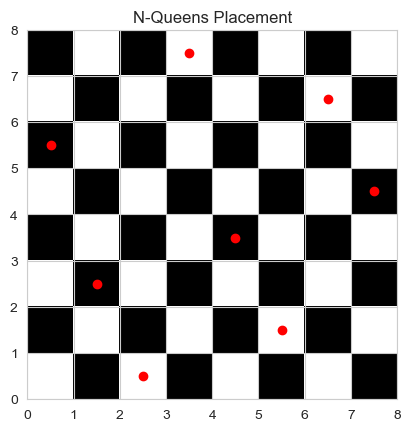

In [67]:
plot_board(tools.selBest(population, k=1)[0])

By the way, this solution corresponds to the solution 11 on the [Wikipedia page](https://en.wikipedia.org/wiki/Eight_queens_puzzle#Constructing_and_counting_solutions_when_n_=_8) for the algorithm 
![Chessboard](wiki.png)
Lower, a different solution is presented.

In [73]:
population_size = 2500
generations = 100
crossover_prob = 0.8
mutation_prob = 0.2

population = toolbox.population(n=population_size)

fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit


for generation in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob)

    fitnesses = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit

    population[:] = toolbox.select(population + offspring, k=population_size)

best_ind = tools.selBest(population, k=1)[0]
print("Best individual:", best_ind)
print("Fitness:", best_ind.fitness.values[0])

Best individual: [2, 5, 1, 4, 7, 0, 6, 3]
Fitness: 0.0


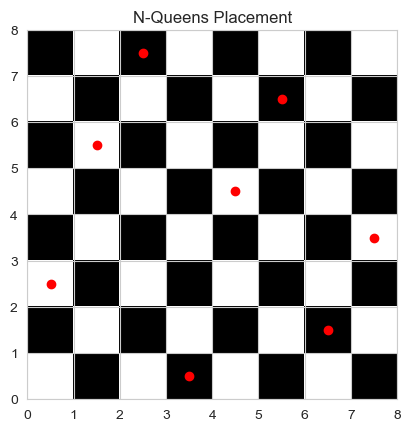

In [74]:
plot_board(tools.selBest(population, k=1)[0])